In [41]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.NA62)
plt.rc('legend',fontsize=12)
import CEDAR_Parameters as Cpm
importlib.reload(Cpm)
import UsefulFunctions as Ufunc
importlib.reload(Cpm)
from scipy.integrate import quad
from scipy.stats import poisson

In [42]:
filename = "Cedar_data/data_production.txt"
CEDARH = Cpm.CEDARH()
UF = Ufunc.UsefulFunctions(CEDARH)

In [34]:
def ELConvert(value):
  return  1.239841 / value


In [10]:
events = []
splitted = []
with open(filename) as f:
    for line in f.readlines():
        if "=" in line.split(",")[0]:
            events.append(splitted)
            splitted = []
            continue
        splitted.append(line.split(","))

In [11]:
count_z = []  
waves = []
angle  = []

#fig01, ax01 = plt.subplots(1, 1, figsize=(10, 10))

for t in range(len(events)):  
    max_ = 0
    min_ = 9999999
    count=0
    for i in range(len(events[t])):
        z = float(events[t][i][2])
        e = float(events[t][i][9])
        x = float(events[t][i][0])
        y = float(events[t][i][1])
        x1 = float(events[t][i][10])
        y1 = float(events[t][i][11])
        z1 = float(events[t][i][12])
        waves.append(ELConvert(e*1e6)*1e3)
        
        data_x = [x,x1]
        data_y = [y,y1]
        data_z = [z,z1]
        
        #ax01.plot(data_y,data_x)
        #if t==1:
            #ax01.plot(data_z,data_x)
            
        dist_x = x1-x
        dist_z = z1-z
        if (dist_z > 0):
            angle.append(np.arctan(dist_x/dist_z))
        
        #print(z)
        count+=1
        if z > max_:
            max_ = z
        if z < min_:
            min_ = z
            
    print("####################")
    print(min_,max_)        
    diff = (max_-min_)/1000
    print(count)
    print(count/diff)
    if count/diff < 100:
        continue
    count_z.append(count/diff)

##########
69667.9492 75298.9521
1088
193.2160255147447
##########
69666.2603 75298.6457
1045
185.5341788223512
##########
69660.7884 75295.5006
1079
191.49159028920786
##########
69663.1725 75296.5019
1125
199.7042814503266
##########
69658.5675 75290.2366
1108
196.74451398431776
##########
69671.7669 75290.3712
1018
181.183786158424
##########
69662.8459 75298.04
1021
181.1827564200497
##########
69663.6601 75293.6937
1129
200.5316629016207
##########
69670.2056 75298.109
1158
205.760461346938
##########
69664.5553 75290.9073
1132
201.196085847455
##########
69668.196 75296.3115
1088
193.3151514036981
##########
69663.7922 75297.2818
1117
198.2785234927921
##########
69664.054 75297.8549
1120
198.80006764172293
##########
69658.081 75296.1325
1057
187.47611652713704
##########
69661.12 75298.4039
1040
184.4860075257161
##########
69661.838 75291.3857
1096
194.68704386322207
##########
69658.6581 75297.9865
1063
188.49762322761703
##########
69664.5043 75283.96
1114
198.23984020374053

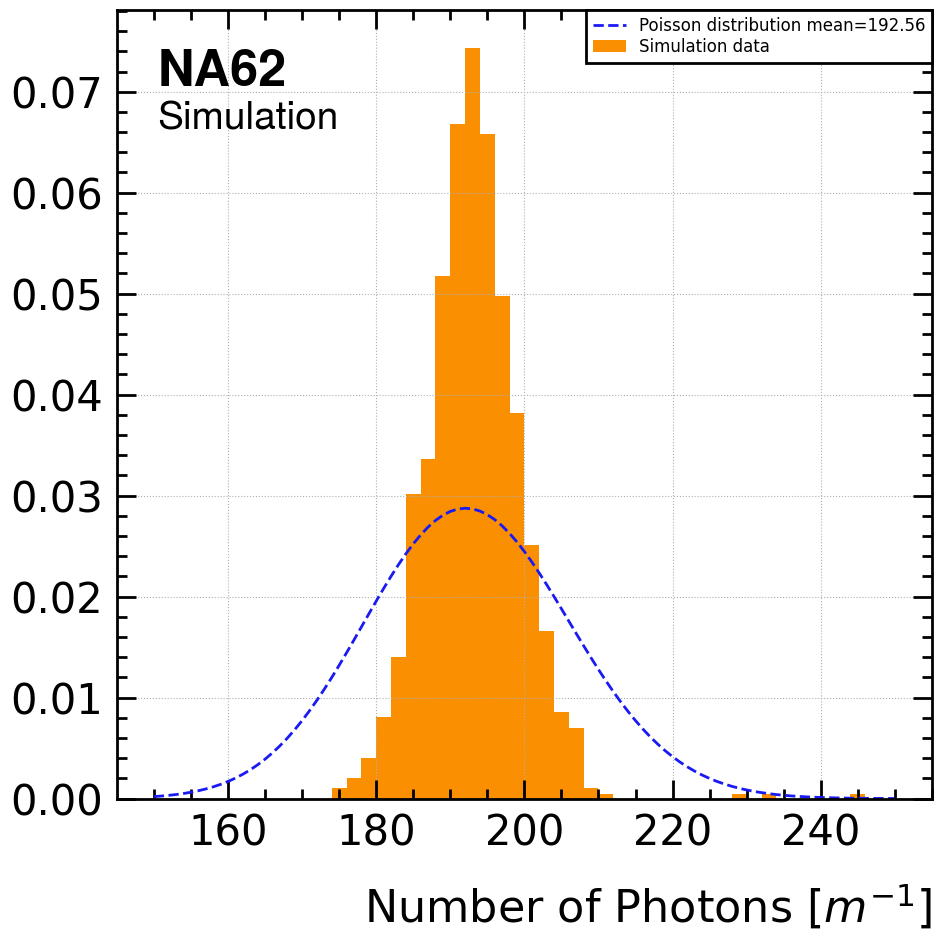

In [44]:
fig02, ax02 = plt.subplots(1, 1, figsize=(10, 10))
I = quad(UF.Tamm, 180e-9, 700e-9)
t = np.linspace(150, 250, 101)
data = poisson.pmf(t,I[0])
ax02.plot(t,data,"--", label="Poisson distribution mean={:.2f}".format(I[0]))
ax02.hist(count_z,bins=50,range=(150,250),density=True, label="Simulation data")
ax02.set_xlabel("Number of Photons [$m^{-1}$]")
hep.na62.text("Simulation")
plt.legend()
plt.grid()
plt.show()